In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import dill as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import category_encoders as ce

In [4]:
df = pd.read_csv("../data.csv")
df.head()

,SZ GR,CERTCT,SHAPE,COLOR,CLARITY,CUT,POLISH,SYMMETRY,FLUO,P/ct,rap,PUR RAP DIS
0,0.30-0.34,0.31,ROUND,9,6,2,2,2,4,1685,2700,-38
1,0.30-0.34,0.31,ROUND,9,6,2,2,2,4,1685,2700,-38
2,0.30-0.34,0.31,ROUND,9,6,2,2,2,4,1685,2700,-38
3,0.30-0.34,0.31,ROUND,9,6,2,2,2,4,1685,2700,-38
4,0.30-0.34,0.31,ROUND,9,6,2,2,2,4,1678,2700,-38


In [5]:
df['SZ GR'].unique()

array(['0.30-0.34', '0.35-0.39', '0.40-0.44', '0.45-0.49', '0.50-0.59',
       '0.60-0.69', '0.70-0.74', '0.75-0.79', '0.80-0.89', '0.90-0.94',
       '1.00-1.19', '1.20-1.29', '1.30-1.39', '1.40-1.49', '1.50-1.69',
       '1.70-1.79', '1.80-1.89', '1.90-1.99', '2.00-2.19', '2.50-2.69',
       '2.70-2.79'], dtype=object)

In [6]:
df.isna().sum()

SZ GR          0
CERTCT         0
SHAPE          0
COLOR          0
CLARITY        0
CUT            0
POLISH         0
SYMMETRY       0
FLUO           0
P/ct           0
rap            0
PUR RAP DIS    0
dtype: int64

In [7]:
X = df.drop(['P/ct'],axis=1)
Y = df['P/ct']

In [7]:
#since shape column has only one unique value, we will drop this column.
X.drop(['SHAPE'],axis=1,inplace=True) 

<AxesSubplot:>

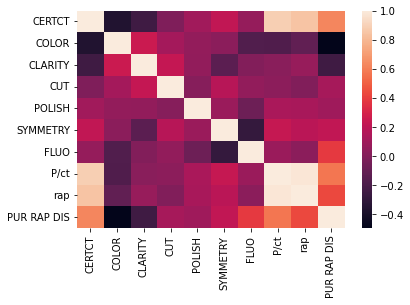

In [8]:
sns.heatmap(df.corr())

In [9]:
numeric_features = list(X.drop(['SZ GR'],axis=1).columns)
numeric_transformer = StandardScaler()

categorical_features = ["SZ GR"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [10]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [12]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CERTCT', 'COLOR', 'CLARITY',
                                                   'CUT', 'POLISH', 'SYMMETRY',
                                                   'FLUO', 'rap',
                                                   'PUR RAP DIS']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SZ GR'])])),
                ('classifier', LinearRegression())])

In [13]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.992


In [14]:
y_pred = clf.predict(X_test)

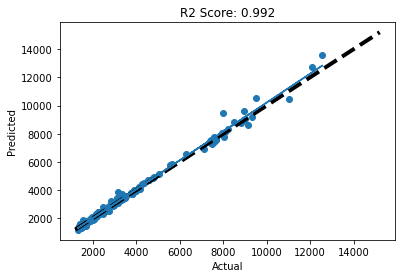

In [15]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test2, y_pred2 = y_test.values.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test2, LinearRegression().fit(y_test2, y_pred2).predict(y_test2))
ax.set_title('R2 Score: ' + str(round(r2_score(y_test2, y_pred2),3)))
plt.show()

In [16]:
clf.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['CERTCT', 'COLOR', 'CLARITY', 'CUT', 'POLISH',
                                   'SYMMETRY', 'FLUO', 'rap', 'PUR RAP DIS']),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['SZ GR'])]),
 'classifier': LinearRegression()}

In [11]:
clf.feature_names_in_

array(['SZ GR', 'CERTCT', 'COLOR', 'CLARITY', 'CUT', 'POLISH', 'SYMMETRY',
       'FLUO', 'rap', 'PUR RAP DIS'], dtype=object)

In [13]:
with open('diamond.pkl', 'wb') as handle:
    pickle.dump(clf, handle)

In [17]:
X.columns

Index(['SZ GR', 'CERTCT', 'COLOR', 'CLARITY', 'CUT', 'POLISH', 'SYMMETRY',
       'FLUO', 'rap', 'PUR RAP DIS'],
      dtype='object')

In [24]:
test_df = pd.DataFrame({'SZ GR':['0.30-0.34'], 'CERTCT':[0.31], 'COLOR':[9], 'CLARITY':[6], 'CUT':[2], 'POLISH':[2], 'SYMMETRY':[2],
       'FLUO':[4], 'rap':[2700], 'PUR RAP DIS':[-38]})
test_df

,SZ GR,CERTCT,COLOR,CLARITY,CUT,POLISH,SYMMETRY,FLUO,rap,PUR RAP DIS
0,0.30-0.34,0.31,9,6,2,2,2,4,2700,-38


In [25]:
print(clf.predict(test_df))

[1711.38673419]


Without RAP

In [8]:
X.drop(['SHAPE','rap'],axis=1,inplace=True) 

In [10]:
numeric_features = list(X.drop(['SZ GR'],axis=1).columns)
numeric_transformer = StandardScaler()

categorical_features = ["SZ GR"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [11]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [13]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CERTCT', 'COLOR', 'CLARITY',
                                                   'CUT', 'POLISH', 'SYMMETRY',
                                                   'FLUO', 'PUR RAP DIS']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SZ GR'])])),
                ('classifier', LinearRegression())])

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.913


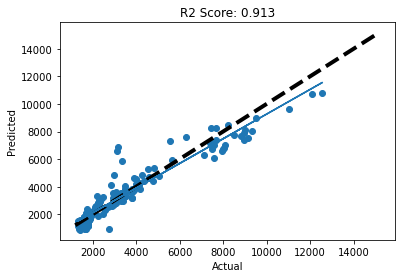

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test2, y_pred2 = y_test.values.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test2, LinearRegression().fit(y_test2, y_pred2).predict(y_test2))
ax.set_title('R2 Score: ' + str(round(r2_score(y_test2, y_pred2),3)))
plt.show()

In [17]:
with open('diamond2.pkl', 'wb') as handle:
    pickle.dump(clf, handle)

With RAP delta

In [18]:
df.columns

Index(['SZ GR', 'CERTCT', 'SHAPE', 'COLOR', 'CLARITY', 'CUT', 'POLISH',
       'SYMMETRY', 'FLUO', 'P/ct', 'rap', 'PUR RAP DIS'],
      dtype='object')

In [19]:
diff = df['rap'] - df['P/ct']

In [20]:
X['Difference'] = diff

In [21]:
X.head()

,SZ GR,CERTCT,COLOR,CLARITY,CUT,POLISH,SYMMETRY,FLUO,PUR RAP DIS,Difference
0,0.30-0.34,0.31,9,6,2,2,2,4,-38,1015
1,0.30-0.34,0.31,9,6,2,2,2,4,-38,1015
2,0.30-0.34,0.31,9,6,2,2,2,4,-38,1015
3,0.30-0.34,0.31,9,6,2,2,2,4,-38,1015
4,0.30-0.34,0.31,9,6,2,2,2,4,-38,1022


In [22]:
numeric_features = list(X.drop(['SZ GR'],axis=1).columns)
numeric_transformer = StandardScaler()

categorical_features = ["SZ GR"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [23]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [25]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CERTCT', 'COLOR', 'CLARITY',
                                                   'CUT', 'POLISH', 'SYMMETRY',
                                                   'FLUO', 'PUR RAP DIS',
                                                   'Difference']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SZ GR'])])),
                ('classifier', LinearRegression())])

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.947


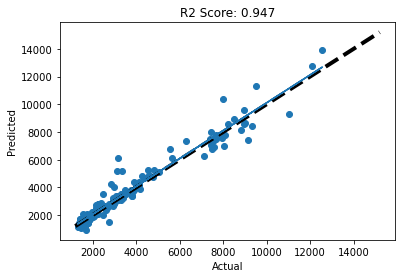

In [28]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test2, y_pred2 = y_test.values.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test2, LinearRegression().fit(y_test2, y_pred2).predict(y_test2))
ax.set_title('R2 Score: ' + str(round(r2_score(y_test2, y_pred2),3)))
plt.show()

In [29]:
with open('diamond3.pkl', 'wb') as handle:
    pickle.dump(clf, handle)

Full Data

In [20]:
df = pd.read_csv("../MB_Full_data.csv")
df.head()

,Price per Carat,Size,Colour,Clarity,Month,Year,Rapper,Rappri
0,13248.0,1.01-1.09,D,IF,Jan,2017,-36.0,20700
1,10560.0,1.01-1.09,D,VVS1,Jan,2017,-36.0,16500
2,9072.0,1.01-1.09,D,VVS2,Jan,2017,-37.0,14400
3,8228.0,1.01-1.09,D,VS1,Jan,2017,-32.0,12100
4,7490.0,1.01-1.09,D,VS2,Jan,2017,-30.0,10700


In [51]:
df['Month'].unique()

array(['Jan', 'Feb', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Mar'], dtype=object)

In [52]:
X = df[['Size','Colour','Clarity','Month','Rapper','Rappri']]
y = df['Price per Carat']

In [53]:
numeric_features = ['Rapper','Rappri']
numeric_transformer = StandardScaler()

categorical_features = ["Size","Colour","Clarity","Month"]
categorical_transformer = ce.cat_boost.CatBoostEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [54]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [56]:
X_train.columns

Index(['Size', 'Colour', 'Clarity', 'Month', 'Rapper', 'Rappri'], dtype='object')

In [57]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rapper', 'Rappri']),
                                                 ('cat', CatBoostEncoder(),
                                                  ['Size', 'Colour', 'Clarity',
                                                   'Month'])])),
                ('classifier', LinearRegression())])

In [63]:
y_pred = clf.predict(X_test)

In [59]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.991


In [66]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Model RMSE:",rmse)

Model RMSE: 361.1792558919992


In [60]:
with open('diamond4.pkl', 'wb') as handle:
    pickle.dump(clf, handle)

In [61]:
test_df = pd.DataFrame({'Size':['1.01-1.09'], 'Colour':['D'], 'Clarity':['IF'], 'Month':['Jan'],'Rapper':[-36], 'Rappri':[20700]})
test_df

,Size,Colour,Clarity,Month,Rapper,Rappri
0,1.01-1.09,D,IF,Jan,-36,20700


In [62]:
clf.predict(test_df)

array([13236.54693264])